# Libraries

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim  as optim

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm, trange

## Data

In [2]:
full_dataset=np.load(r'CatsVDogs\training_data.npy',allow_pickle=True)
train_set, val_set = torch.utils.data.random_split(full_dataset, [int(len(full_dataset)*0.75)+1, int(len(full_dataset)*0.25)])

X = torch.Tensor([i[0] for i in train_set])
Y = torch.Tensor([i[1] for i in train_set])

X_a = torch.Tensor([i[0] for i in val_set])
Y_a = torch.Tensor([i[1] for i in val_set])

## Model

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        self.fc1=nn.Linear(128*2*2, 170, bias=True)
        self.fc2=nn.Linear(170, 56, bias=True)
        self.fc3=nn.Linear(56, 2, bias=True)
    
    def forward(self,x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        
        x = torch.flatten(x, start_dim=1)
        
        x= F.relu(self.fc1(x)) 
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        
        return F.softmax(x, dim=1)

## CUDA

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    net_class = Net().to(device)
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    net_class = Net()
    print("Running on the CPU")


Running on the GPU


## Training loop

In [5]:
BATCH_SIZE = 100
EPOCHS = 30

optimizer = optim.Adam(net_class.parameters(),lr= 0.0002)
loss_function = nn.MSELoss()

loss_grap=[]
mean_grap=[]

for epoch in range(EPOCHS):
    loss_mean=0
    for i in trange(0, len(train_set), BATCH_SIZE,  desc='Loss calculation'):
        
        batch_X=X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y=Y[i:i+BATCH_SIZE]
        
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        net_class.zero_grad()
        outputs = net_class(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()
        loss_grap.append(loss)
        loss_mean+=loss
    print(f'Epoch {epoch+1} error mean {(((loss_mean/i).item())*100):.5f}')
    mean_grap.append(((loss_mean/i).item())*100)

Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.23it/s]

Epoch 1 error mean 0.23422


Loss calculation:   1%|          | 2/188 [00:00<00:10, 17.43it/s]

Epoch 2 error mean 0.20228


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.91it/s]

Epoch 3 error mean 0.17729


Loss calculation:   2%|▏         | 3/188 [00:00<00:10, 16.93it/s]

Epoch 4 error mean 0.15700


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.40it/s]

Epoch 5 error mean 0.13473


Loss calculation:   1%|          | 2/188 [00:00<00:09, 18.79it/s]

Epoch 6 error mean 0.11989


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.02it/s]

Epoch 7 error mean 0.11131


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.98it/s]

Epoch 8 error mean 0.10060


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.23it/s]

Epoch 9 error mean 0.07809


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.10it/s]

Epoch 10 error mean 0.07004


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.22it/s]

Epoch 11 error mean 0.06535


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.23it/s]

Epoch 12 error mean 0.05747


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.03it/s]

Epoch 13 error mean 0.04557


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.40it/s]

Epoch 14 error mean 0.03750


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.39it/s]

Epoch 15 error mean 0.03364


Loss calculation:   1%|          | 2/188 [00:00<00:10, 17.86it/s]

Epoch 16 error mean 0.03857


Loss calculation:   1%|          | 2/188 [00:00<00:12, 14.49it/s]

Epoch 17 error mean 0.03275


Loss calculation:   1%|          | 2/188 [00:00<00:11, 16.47it/s]

Epoch 18 error mean 0.02254


Loss calculation:   1%|          | 2/188 [00:00<00:09, 18.87it/s]

Epoch 19 error mean 0.01879


Loss calculation:   1%|          | 2/188 [00:00<00:09, 19.15it/s]

Epoch 20 error mean 0.01640


Loss calculation:   1%|          | 2/188 [00:00<00:10, 17.85it/s]

Epoch 21 error mean 0.01653


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.17it/s]

Epoch 22 error mean 0.01594


Loss calculation:   1%|          | 2/188 [00:00<00:10, 17.74it/s]

Epoch 23 error mean 0.01622


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.33it/s]

Epoch 24 error mean 0.01565


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.33it/s]

Epoch 25 error mean 0.01673


Loss calculation:   1%|          | 2/188 [00:00<00:10, 18.31it/s]

Epoch 26 error mean 0.01964


Loss calculation:   1%|          | 2/188 [00:00<00:10, 17.58it/s]

Epoch 27 error mean 0.01697


Loss calculation:   1%|          | 2/188 [00:00<00:10, 17.38it/s]

Epoch 28 error mean 0.01587


Loss calculation:   1%|          | 2/188 [00:00<00:11, 16.00it/s]

Epoch 29 error mean 0.01468


Loss calculation: 100%|██████████| 188/188 [00:14<00:00, 12.81it/s]

Epoch 30 error mean 0.01112


## Error

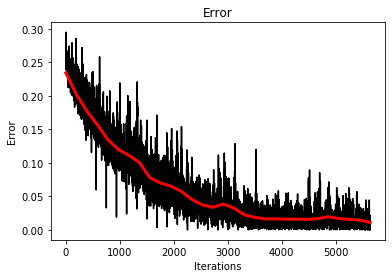

In [6]:
plt.plot(range(len(loss_grap)),loss_grap,c='black')

xpt=np.linspace(0,len(loss_grap),len(mean_grap))
xpt=[int(i) for i in xpt]

plt.plot(xpt,mean_grap,c='red',lw=3)

plt.title('Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

## Accuracy

In [7]:
correct = 0
total = 0
with torch.no_grad():
    
    for i in trange(len(X_a), desc='Accuracy calculation'):
        
        X_a,Y_a = X_a.to(device), Y_a.to(device)
        
        real_class = torch.argmax(Y_a[i])
        
        net_out = net_class(X_a[i].view(-1,1,50,50))[0]
        
        predicted_class = torch.argmax(net_out)
        
        if predicted_class == real_class:
            correct += 1
        total += 1

print("Accuracy: ",round(correct/total,3))

Accuracy calculation: 100%|██████████| 6236/6236 [00:16<00:00, 374.37it/s]

Accuracy:  0.725


## New Data

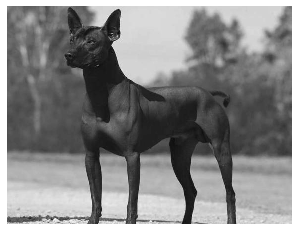

In [8]:
import cv2 

path1 = r'CatsVDogs\imgs\gat.jpg'
path2 = r'CatsVDogs\imgs\salchi.jpg'
path3 = r'CatsVDogs\imgs\malvada.jpeg'
path4 = r'CatsVDogs\imgs\charli.jpeg'
path5 = r'CatsVDogs\imgs\bartolo.jpeg'
path6 = r'CatsVDogs\imgs\boz.jpg'
  
img = cv2.imread(path6, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()
# img = cv2.resize(img, (50, 50))
# plt.imshow(img,cmap='gray')
# plt.axis('off')
# plt.show()

In [9]:
innn = torch.Tensor([i for i in img])
innn = innn.to(device)
net_res = net_class(innn.view(-1,1,50,50))
print(f'Hay una certeza del {((net_res[0][0])*100):.2f} % que sea gato y un {((net_res[0][1])*100):.2f} % que sea perro')

RuntimeError: shape '[-1, 1, 50, 50]' is invalid for input of size 249964

## Saving model

In [ ]:
sv = False
if sv:
    torch.save(net_class, r'CatsVDogs\NNCatsVDogs.pt')
    print('Model saved')

## Loading model

In [ ]:
ld = False
if ld:
    load_model = torch.load(r'CatsVDogs\NNCatsVDogs.pt')
    print('Model loaded\n')
    load_model = load_model.to(device)
    load_res = load_model(innn.view(-1,1,50,50))
    print(f'Hay una certeza del {((load_res[0][0])*100):.2f} % que sea gato y un {((load_res[0][1])*100):.2f} % que sea perro')

In [ ]:
torch.save(load_model.state_dict(), r'CatsVDogs\NNCVD.pt')